## Solving Ordinary Differential Equations

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Solving equations numerically is a useful skill, but was not terribly difficult to code ourselves.  The situation quickly escalates when we move from solving algebriac equations to differential equations.  In principle we can still do it outselves but the job is definiely more complex.

We will again take an experimental approach, we will start with a problem we know how to solve and try to see what is happening.  Let's take the case of the 1d harmonic oscilator $$\ddot x + \gamma \dot x + \omega_0^2 x = 0$$

The way that python deals with these equations is to reduce them to a coupled set of first order equations.  This is perhaps the part that is more annoying, "Why can't I just write the equation I want to solve???".  We can try to work out the advantages later, but for now you just have to deal with it.

In this case, we define it as follows:  $$\dot x = v$$ and $$\dot v = -\gamma v - \omega_0^2 x$$
So we have two variables, position $x$ and velocity $v$, that both evolve according to first order ODEs but their evolution is coupled ($\dot v$ depends on $x$)

Now we define a function that, given a v and x, returns these derivatives:

In [3]:
def derivative(X,t,gamma=1,omega_0=1): ## X is the array [x,v]
        ## notice that we need to use t as an argument even though we don't use it
    return [X[1],-gamma*X[1]-omega_0**2*X[0]] ## return the array dot X defined by our equation

In [4]:
from scipy import integrate

We have defined the equation.  We now need to know the initial conditions and where we are solving this (this is numerical, so we have to pick some finite amount of time):

In [5]:
t_R=np.linspace(0,10,100) # range of time we want to solve
X0=[3.,0]     #initial conditions

Now we use the basic ODE integrator in scipy

In [6]:
sol1=integrate.odeint(derivative,X0,t_R)  #syntax - odeint(derivative,initial conditon, time)

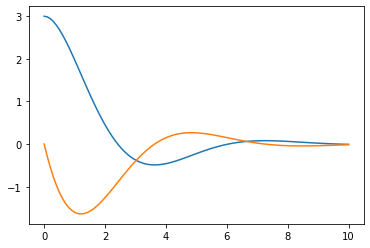

In [7]:
plt.plot(t_R,sol1[:,0])  # returns solution for X at each point in time  sol[:,0] is x(t)
plt.plot(t_R,sol1[:,1])  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.show()

I secretly planned ahead when I derived my derivative function.  Because odtint takes a function as input, you can pass any of the variabels taht the function defines.  This goes under the "args" option, where we pass this assition infomration

In [8]:
sol2=integrate.odeint(derivative,X0,t_R,args=(2,20)) # now passing gamma=2 and omega_0=20

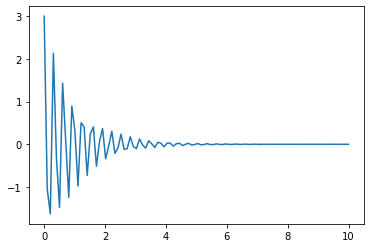

In [9]:
plt.plot(t_R,sol2[:,0])  # returns solution for X at each point in time  sol[:,0] is x(t)
#plt.plot(t_R,sol2[:,1])  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.show()

Now let's see how well it is tracking the exact solution.  To make this extra easy, let's take $\gamma=0$ so that our solution should be $$x(t) = 3 \cos(\omega_0 t)$$

In [10]:
sol3=integrate.odeint(derivative,X0,t_R,args=(0,20)) # now passing gamma=0 and omega_0=20

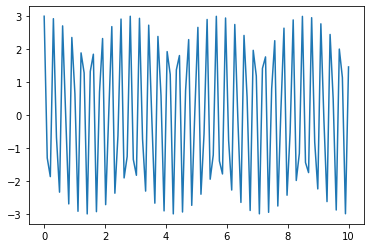

In [11]:
plt.plot(t_R,sol3[:,0])  # returns solution for X at each point in time  sol[:,0] is x(t)
#plt.plot(t_R,3*np.cos(20*t_R))  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.show()

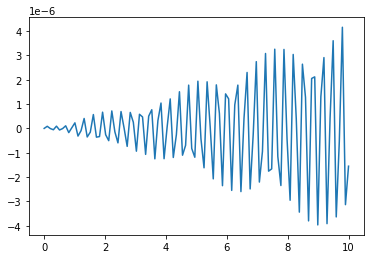

In [12]:
plt.plot(t_R,sol3[:,0]-3*np.cos(20*t_R))  # returns solution for X at each point in time  sol[:,0] is x(t)
#plt.plot(t_R,3*np.cos(20*t_R))  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.show()

In [13]:
t_F=np.linspace(0,10,10000) # range of time we want to solve
sol4=integrate.odeint(derivative,X0,t_F,args=(0,20)) # now passing gamma=0 and omega_0=20

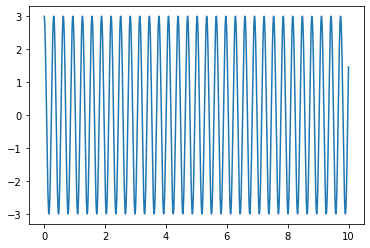

In [14]:
plt.plot(t_F,sol4[:,0])  # returns solution for X at each point in time  sol[:,0] is x(t)
#plt.plot(t_R,3*np.cos(20*t_R))  # returns solution for X at each point in time  sol[:,1] is v(t)
plt.show()

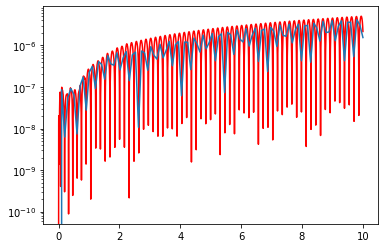

In [15]:
plt.plot(t_F,np.abs(sol4[:,0]-3*np.cos(20*t_F)),color='red')
plt.plot(t_R,np.abs(sol3[:,0]-3*np.cos(20*t_R)))
plt.yscale('log')

Now we see something unexpected happening.  We might have thought that t_F and t_R are the points where odeint is solving the equation.  As such we would have expected to get a smaller error by using a finer sampling in time.  

In [16]:
sol5=integrate.odeint(derivative,X0,t_R,args=(0,20),mxstep=47)
sol6=integrate.odeint(derivative,X0,t_R,args=(0,20),mxstep=50)

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(-4.0, 4.0)

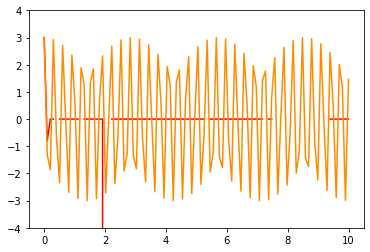

In [17]:
plt.plot(t_R,sol5[:,0],color='red')
plt.plot(t_R,sol6[:,0],color='darkorange')
#plt.plot(t_R,sol3[:,0])
plt.ylim(-4,4)

In [18]:
sol7=integrate.odeint(derivative,X0,t_F,args=(0,20),mxstep=20)  # Using finer spacing but fewer interal steps

(-4.0, 4.0)

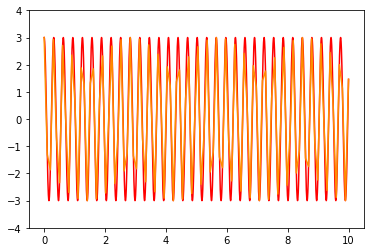

In [19]:
plt.plot(t_F,sol7[:,0],color='red')
plt.plot(t_R,sol6[:,0],color='darkorange')
#plt.plot(t_R,sol3[:,0])
plt.ylim(-4,4)

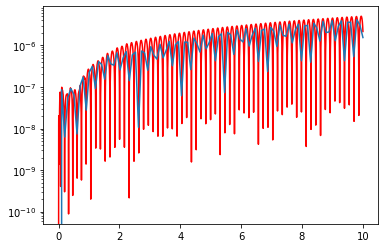

In [20]:
plt.plot(t_F,np.abs(sol7[:,0]-3*np.cos(20*t_F)),color='red')
plt.plot(t_R,np.abs(sol3[:,0]-3*np.cos(20*t_R)))
plt.yscale('log')

So we see that all that happened in some sense is that if we take in external time-grid to be finer, we don't need as many interal steps.  However, that has not explained the weird behavior with the error.

## Time-dependent coefficients, External Force

In [21]:
def D_time(X,t,gamma=1,omega_0=5,Fext=10,wext=2): ## X is the array [x,v]
        ## notice that we need to use t as an argument even though we don't use it
    return [X[1],-gamma*X[1]-omega_0**2*X[0]+Fext*np.cos(wext*t)] ## return the array dot X defined by our equation

In [22]:
t_T=np.linspace(0,20,200)
solT_1=integrate.odeint(D_time,X0,t_T) # now passing gamma=0 and omega_0=20

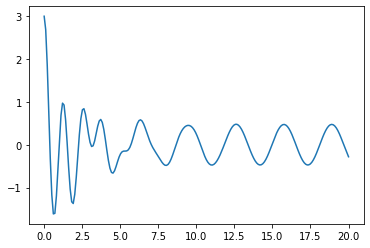

In [23]:
plt.plot(t_T,solT_1[:,0])

## Coupled ODEs

Now we want to consider the problem of coupled harmonic oscilators, obeying the equation:
$$\ddot x +\gamma_x \dot x + \omega_x^2 (x-y) = 0$$
$$\ddot y +\gamma_y \dot y + \omega_y^2 (y-x) = 0$$

In [24]:
def D_coupled(X,t,gamma_x=1,omega_x=1,gamma_y=1,omega_y=1): ## X is the array [x,v]
        ## notice that we need to use t as an argument even though we don't use it
    return [X[1],-gamma_x*X[1]-omega_x**2*(X[0]-X[2]),X[3],-gamma_y*X[3]-omega_y**2*(X[2]-X[0])] ## return the array dot X defined by our equation

In [25]:
t_R=np.linspace(0,10,100) # range of time we want to solve
XC_0=[3.,0,-3.,0]  

In [26]:
solC_1=integrate.odeint(D_coupled,XC_0,t_F,args=(1,20,1,10))

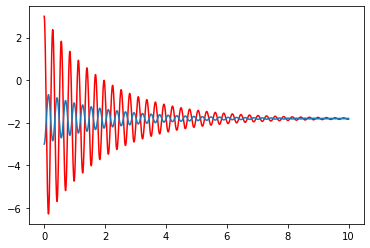

In [27]:
plt.plot(t_F,solC_1[:,0],color='red')
plt.plot(t_F,solC_1[:,2])